In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [52]:
def list_subfolders(directory):
    """
    List all subfolders in the given directory.

    :param directory: The directory to list subfolders from.
    :return: A list of names of all subfolders in the directory.
    """
    # Ensure the directory exists
    if not os.path.isdir(directory):
        raise ValueError(f"The directory {directory} does not exist.")

    # List all entries in the directory
    entries = os.listdir(directory)

    # Filter out the entries that are folders
    folders = [entry for entry in entries if os.path.isdir(os.path.join(directory, entry))]

    return folders


def drop_first_row(df):
    """
    Drops the first row from a pandas DataFrame.

    :param df: A pandas DataFrame.
    :return: A DataFrame with the first row dropped.
    """
    # Drop the first row
    new_df = df.iloc[1:].reset_index(drop=True)
    return new_df


def read_csv_files(directory):
    """
    Reads all CSV files in the given directory and returns their contents.

    :param directory: The directory to search for CSV files.
    :return: A dictionary with filenames as keys and DataFrame objects as values.
    """
    # Ensure the directory exists
    if not os.path.isdir(directory):
        raise ValueError(f"The directory {directory} does not exist.")

    # List all files in the directory
    files = os.listdir(directory)

    # Filter out the files that are CSV
    csv_files = [file for file in files if file.endswith('.csv')]

    # Read each CSV file into a DataFrame and store in a dictionary
    dataframes = {}
    for csv_file in csv_files:
        full_path = os.path.join(directory, csv_file)
        csv_filename = csv_file.split(".csv")[0]
        if "observations" in csv_filename: continue
        dataframes[csv_filename] = drop_first_row(pd.read_csv(full_path)).set_index("trial")

    return dataframes


def read_csv_files_nonmyopic(directory, get_observations=True):
    """
    Reads all CSV files in the given directory and returns their contents.

    :param directory: The directory to search for CSV files.
    :return: A dictionary with filenames as keys and DataFrame objects as values.
    """
    # Ensure the directory exists
    if not os.path.isdir(directory):
        raise ValueError(f"The directory {directory} does not exist.")

    # List all files in the directory
    files = os.listdir(directory)

    # Filter out the files that are CSV
    csv_files = [file for file in files if file.endswith('.csv')]
    if get_observations:
        csv_files = [f for f in csv_files if "observation" in f]
    else:
        csv_files = [f for f in csv_files if "observation" not in f]

    # Read each CSV file into a DataFrame and store in a dictionary
    dataframes = {}
    for csv_file in csv_files:
        full_path = os.path.join(directory, csv_file)
        csv_filename = csv_file.split(".csv")[0]
        dataframes[csv_filename] = drop_first_row(pd.read_csv(full_path)).set_index("trial")

    return dataframes

## Data Analysis for Myopic Experiments without Optimized Surrogate Per Iteration

In [53]:
dirname = "longrun-bayesopt/myopic_bayesopt/"
# Get the relative path to each test function's data from experiments
testfn_dirnames = [f"{dirname}{subdir}" for subdir in list_subfolders(dirname)]
# Create a mapping from test function to policy used to produce GAP data
myopic_experiments = dict()
for td in testfn_dirnames:
    # Read GAP data for current test function
    csv_data = read_csv_files(td)
    # Save gaps for EI, POI, UCB
    testfn = td.split("/")[-1]
    myopic_experiments[testfn] = csv_data
    # Save averages for each policy (EI, POI, UCB)

In [54]:
ei_mean_gaps = []
poi_mean_gaps = []
ucb_mean_gaps = []

for testfn, gaps_df in myopic_experiments.items():
    ei_mean_gaps.append(gaps_df["ei_gaps"].mean())
    poi_mean_gaps.append(gaps_df["poi_gaps"].mean())
    ucb_mean_gaps.append(gaps_df["ucb_gaps"].mean())

<AxesSubplot:>

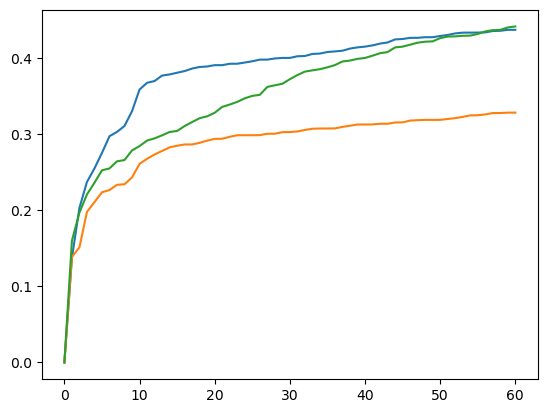

In [56]:
(sum(ei_mean_gaps) / len(ei_mean_gaps)).plot()
(sum(ucb_mean_gaps) / len(ucb_mean_gaps)).plot()
(sum(poi_mean_gaps) / len(poi_mean_gaps)).plot()

## Data Analysis for Non-Myopic Experiments without Optimized Surrogate Per Iteration

In [58]:
dirname = "longrun-bayesopt/nonmyopic_bayesopt/"

# Get the relative path to each test function's data from experiments
testfn_dirnames = [f"{dirname}{subdir}" for subdir in list_subfolders(dirname)]

# Create a mapping from test function to policy used to produce GAP data
nonmyopic_experiments = dict()
for td in testfn_dirnames:
    print(td)
    # Read GAP data for current test function
    csv_data = read_csv_files_nonmyopic(td, get_observations=False)
    # Save gaps for horizons 0 and 1
    testfn = td.split("/")[-1]
    nonmyopic_experiments[testfn] = csv_data

longrun-bayesopt/nonmyopic_bayesopt/rosenbrock
longrun-bayesopt/nonmyopic_bayesopt/bukinn6
longrun-bayesopt/nonmyopic_bayesopt/eggholder
longrun-bayesopt/nonmyopic_bayesopt/holdertable
longrun-bayesopt/nonmyopic_bayesopt/styblinskitang2d
longrun-bayesopt/nonmyopic_bayesopt/braninhoo
longrun-bayesopt/nonmyopic_bayesopt/schwefel3d


### Gather Median GAP

rosenbrock dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


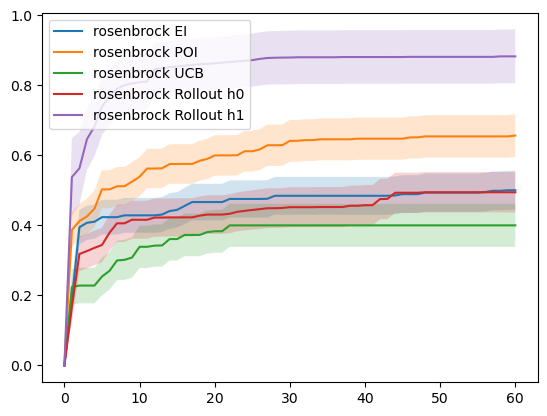

bukinn6 dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


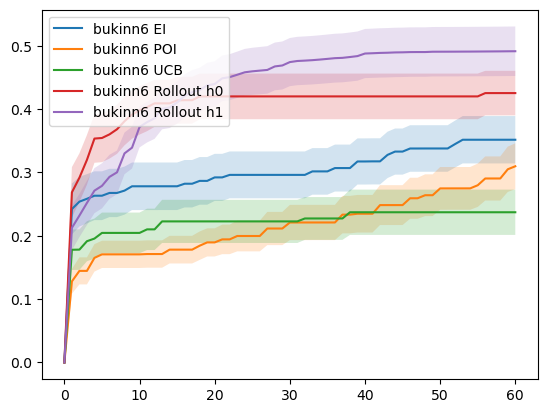

eggholder dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


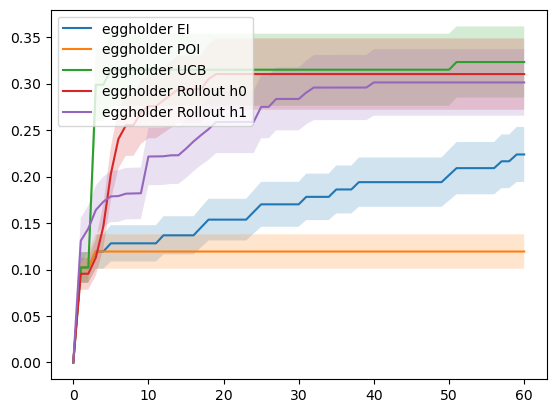

holdertable dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


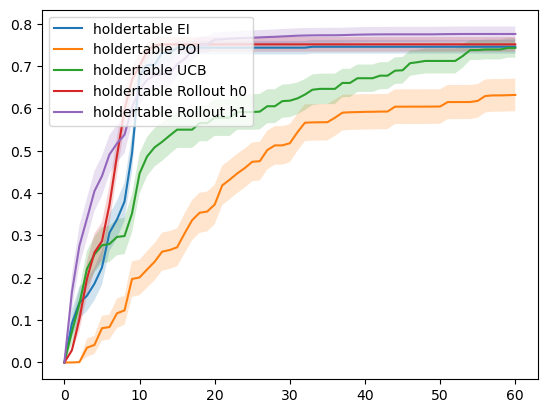

styblinskitang2d dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


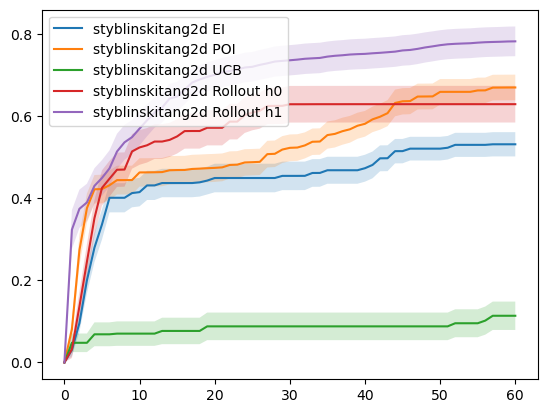

braninhoo dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


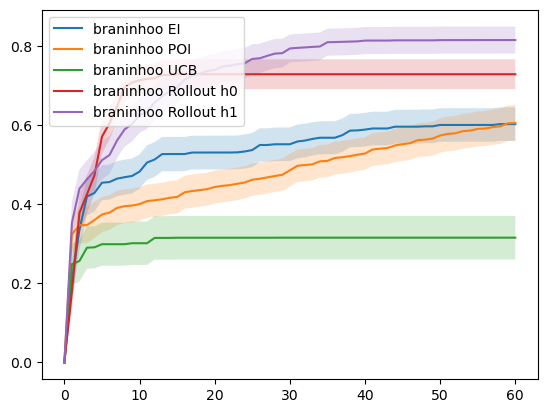

schwefel3d dict_keys(['poi_gaps', 'ucb_gaps', 'ei_gaps'])


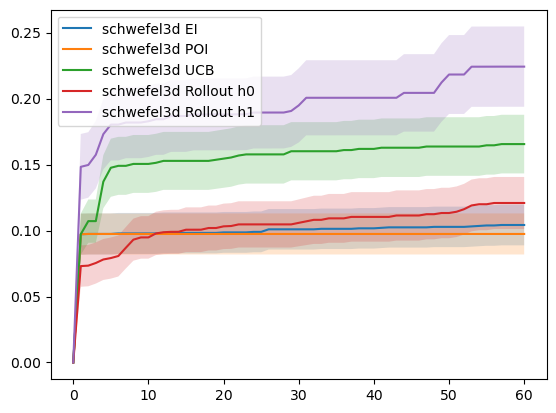

In [63]:
for testfn in nonmyopic_experiments.keys():
    print(testfn, gaps_df.keys())
    myopic_gaps_df = myopic_experiments[testfn]
    nonmyopic_gaps_df = nonmyopic_experiments[testfn]
    x_values = range(len(myopic_gaps_df["ei_gaps"].mean()))
    
    gaps_mean = myopic_gaps_df["ei_gaps"].mean()
    sems = myopic_gaps_df["ei_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} EI")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = myopic_gaps_df["poi_gaps"].mean()
    sems = myopic_gaps_df["poi_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} POI")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = myopic_gaps_df["ucb_gaps"].mean()
    sems = myopic_gaps_df["ucb_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} UCB")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = nonmyopic_gaps_df["rollout_h0_gaps"].mean()
    sems = nonmyopic_gaps_df["rollout_h0_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} Rollout h0")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)
    
    gaps_mean = nonmyopic_gaps_df["rollout_h1_gaps"].mean()
    sems = nonmyopic_gaps_df["rollout_h1_gaps"].sem()
    plt.plot(x_values, gaps_mean, label=f"{testfn} Rollout h1")
    plt.fill_between(x_values, gaps_mean - sems, gaps_mean + sems, alpha=0.2)

    plt.legend(loc="upper left")
    plt.savefig(f"{testfn}_gaps")
    plt.show()